In [1]:
import random
import sys

import numpy as np
import matplotlib.pyplot as plt

# Bokeh imports
from bokeh.io import output_notebook, show, save
from bokeh.plotting import figure, output_file, ColumnDataSource, reset_output
from bokeh.models import HoverTool
output_notebook()

from ipywidgets.widgets import Text

#scipy constants
from scipy.constants import Boltzmann as kB
from scipy.constants import Avogadro as NA
from scipy.constants import Planck as h
from scipy.constants import speed_of_light as c0
from scipy.constants import R

sys.path.append('../CNT-SIM/')
from CNTSimFile import CNTSimFile
from mc_sim import exciton_sim_4_lvl_full_exchange, exciton_sim

Loading BokehJS ...

In [2]:
k_er_per_s = 0.1e9
k_br_per_s = 0.1e9  # constant for radiativ decay from S11*
k_enr_per_s = 2e8 
k_bnr_per_s = 4e8   # constant for non-radiativ decay from S11*

k_de_per_s = 1e8  # constant for going from dark to S11 state
k_ed_per_s = 1e8  # constant for going from S11 to dark statestate

# termal detrapping 10.1021/acs.jpclett.8b03732
k_bd_per_s = 0.5 * (1e12 / 385 + 1e12 / 1132) + 0.1e12 * np.exp(-1.6182e-11 /
                                                                (kB * 300))

k_dnr_per_s = 2e8

kin_const_1 = np.array([k_br_per_s, k_er_per_s, k_bnr_per_s, k_enr_per_s, k_bd_per_s, k_ed_per_s,
                        k_de_per_s, k_dnr_per_s])

In [7]:
diff_const = np.zeros((2,6))

In [8]:
diff_const[0, :] = np.linspace(1.07e15,1.2e16, 6)
diff_const[1, :] = np.linspace(1.07e15/3,1.2e16/3, 6)

In [9]:
exc_sim_diff_1 = CNTSimFile('../sim_output/2020-09-14_exciton_sim_diff_1.h5', kin_const_1)

To be implemented
start of calculation: 2020-09-15 14:36:52.935153
start of exiton simulation: 2020-09-15 14:36:52.935323
2020-09-15 14:36:53.044135
elapsed time: 00:00:00
exciton processed((0/ 6))
start of exiton simulation: 2020-09-15 14:36:53.045766
2020-09-15 14:45:16.488009
elapsed time: 00:08:23
exciton processed((1/ 6))
start of exiton simulation: 2020-09-15 14:45:16.489987
2020-09-15 15:02:24.677863
elapsed time: 00:08:34
exciton processed((3/ 6))
start of exiton simulation: 2020-09-15 15:02:24.682795
2020-09-15 15:10:56.682970
elapsed time: 00:08:31
exciton processed((4/ 6))
start of exiton simulation: 2020-09-15 15:10:56.687827
2020-09-15 15:19:19.312357
elapsed time: 00:08:22
exciton processed((5/ 6))
start of exiton simulation: 2020-09-15 15:19:19.314445
2020-09-15 15:27:49.261822
elapsed time: 00:08:29
2020-09-15 15:27:49.263733
elapsed time: 00:50:56


KeyError: 'defect_density'

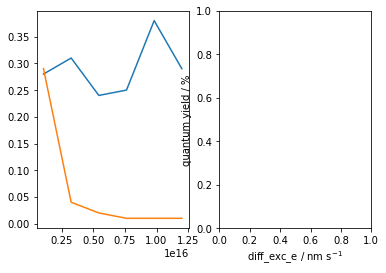

In [10]:
exc_sim_diff_1.diffusion_dependence(10000, exciton_sim, diff_const, {'t_step': 1, 'r_exc_nm': 2,
                                                                     'n_defects': 30, 'CNT_length': 750},
                                   plot=True)

In [11]:
exc_sim_diff_1.save()

In [12]:
exc_sim_diff_1.calc_dict

{'date': '2020-09-15',
 'Diff_const': array([[1.07000000e+15, 3.25600000e+15, 5.44200000e+15, 7.62800000e+15,
         9.81400000e+15, 1.20000000e+16],
        [3.56666667e+14, 1.08533333e+15, 1.81400000e+15, 2.54266667e+15,
         3.27133333e+15, 4.00000000e+15]]),
 'function': 'exciton_sim',
 'method': 'diffusion_dependence',
 't_step': 1,
 'r_exc_nm': 2,
 'n_defects': 30,
 'CNT_length': 750,
 'n_photons': 10000}